In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
mushrooms = pd.read_csv('mushrooms.csv')

In [4]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mushrooms.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
clf = tree.DecisionTreeClassifier()

In [8]:
parameters = {'criterion' : ['entropy'], 'max_depth' : range(2, 20, 3), 'min_samples_split' : range(2, 50, 5), 'min_samples_leaf' : range(2, 50, 2)}

In [9]:
mushrooms = mushrooms.rename(columns={'class' : 'cls'})

In [10]:
list(mushrooms)

['cls',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [11]:
X = mushrooms.drop(['cls'], axis=1)
y = mushrooms.cls

In [12]:
y = np.where(y == 'p', 1, 0)

In [13]:
X = pd.get_dummies(X)

In [14]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=np.random.seed(0))

In [16]:
grid_search_cv = GridSearchCV(clf, parameters, cv=5, n_jobs=-1, verbose=1)

In [17]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(2, 50, 2),
                         'min_samples_split': range(2, 50, 5)},
             verbose=1)

In [18]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [19]:
best_clf = grid_search_cv.best_estimator_

In [20]:
best_clf.score(X_test, y_test)

1.0

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(best_clf, out_file='tree.dot', class_names=["p","e"], filled=True)

In [22]:
from subprocess import call
call(['dot','-Tpng','tree.dot','-o', 'decistion-tree.png','-Gdpi=600'])

0

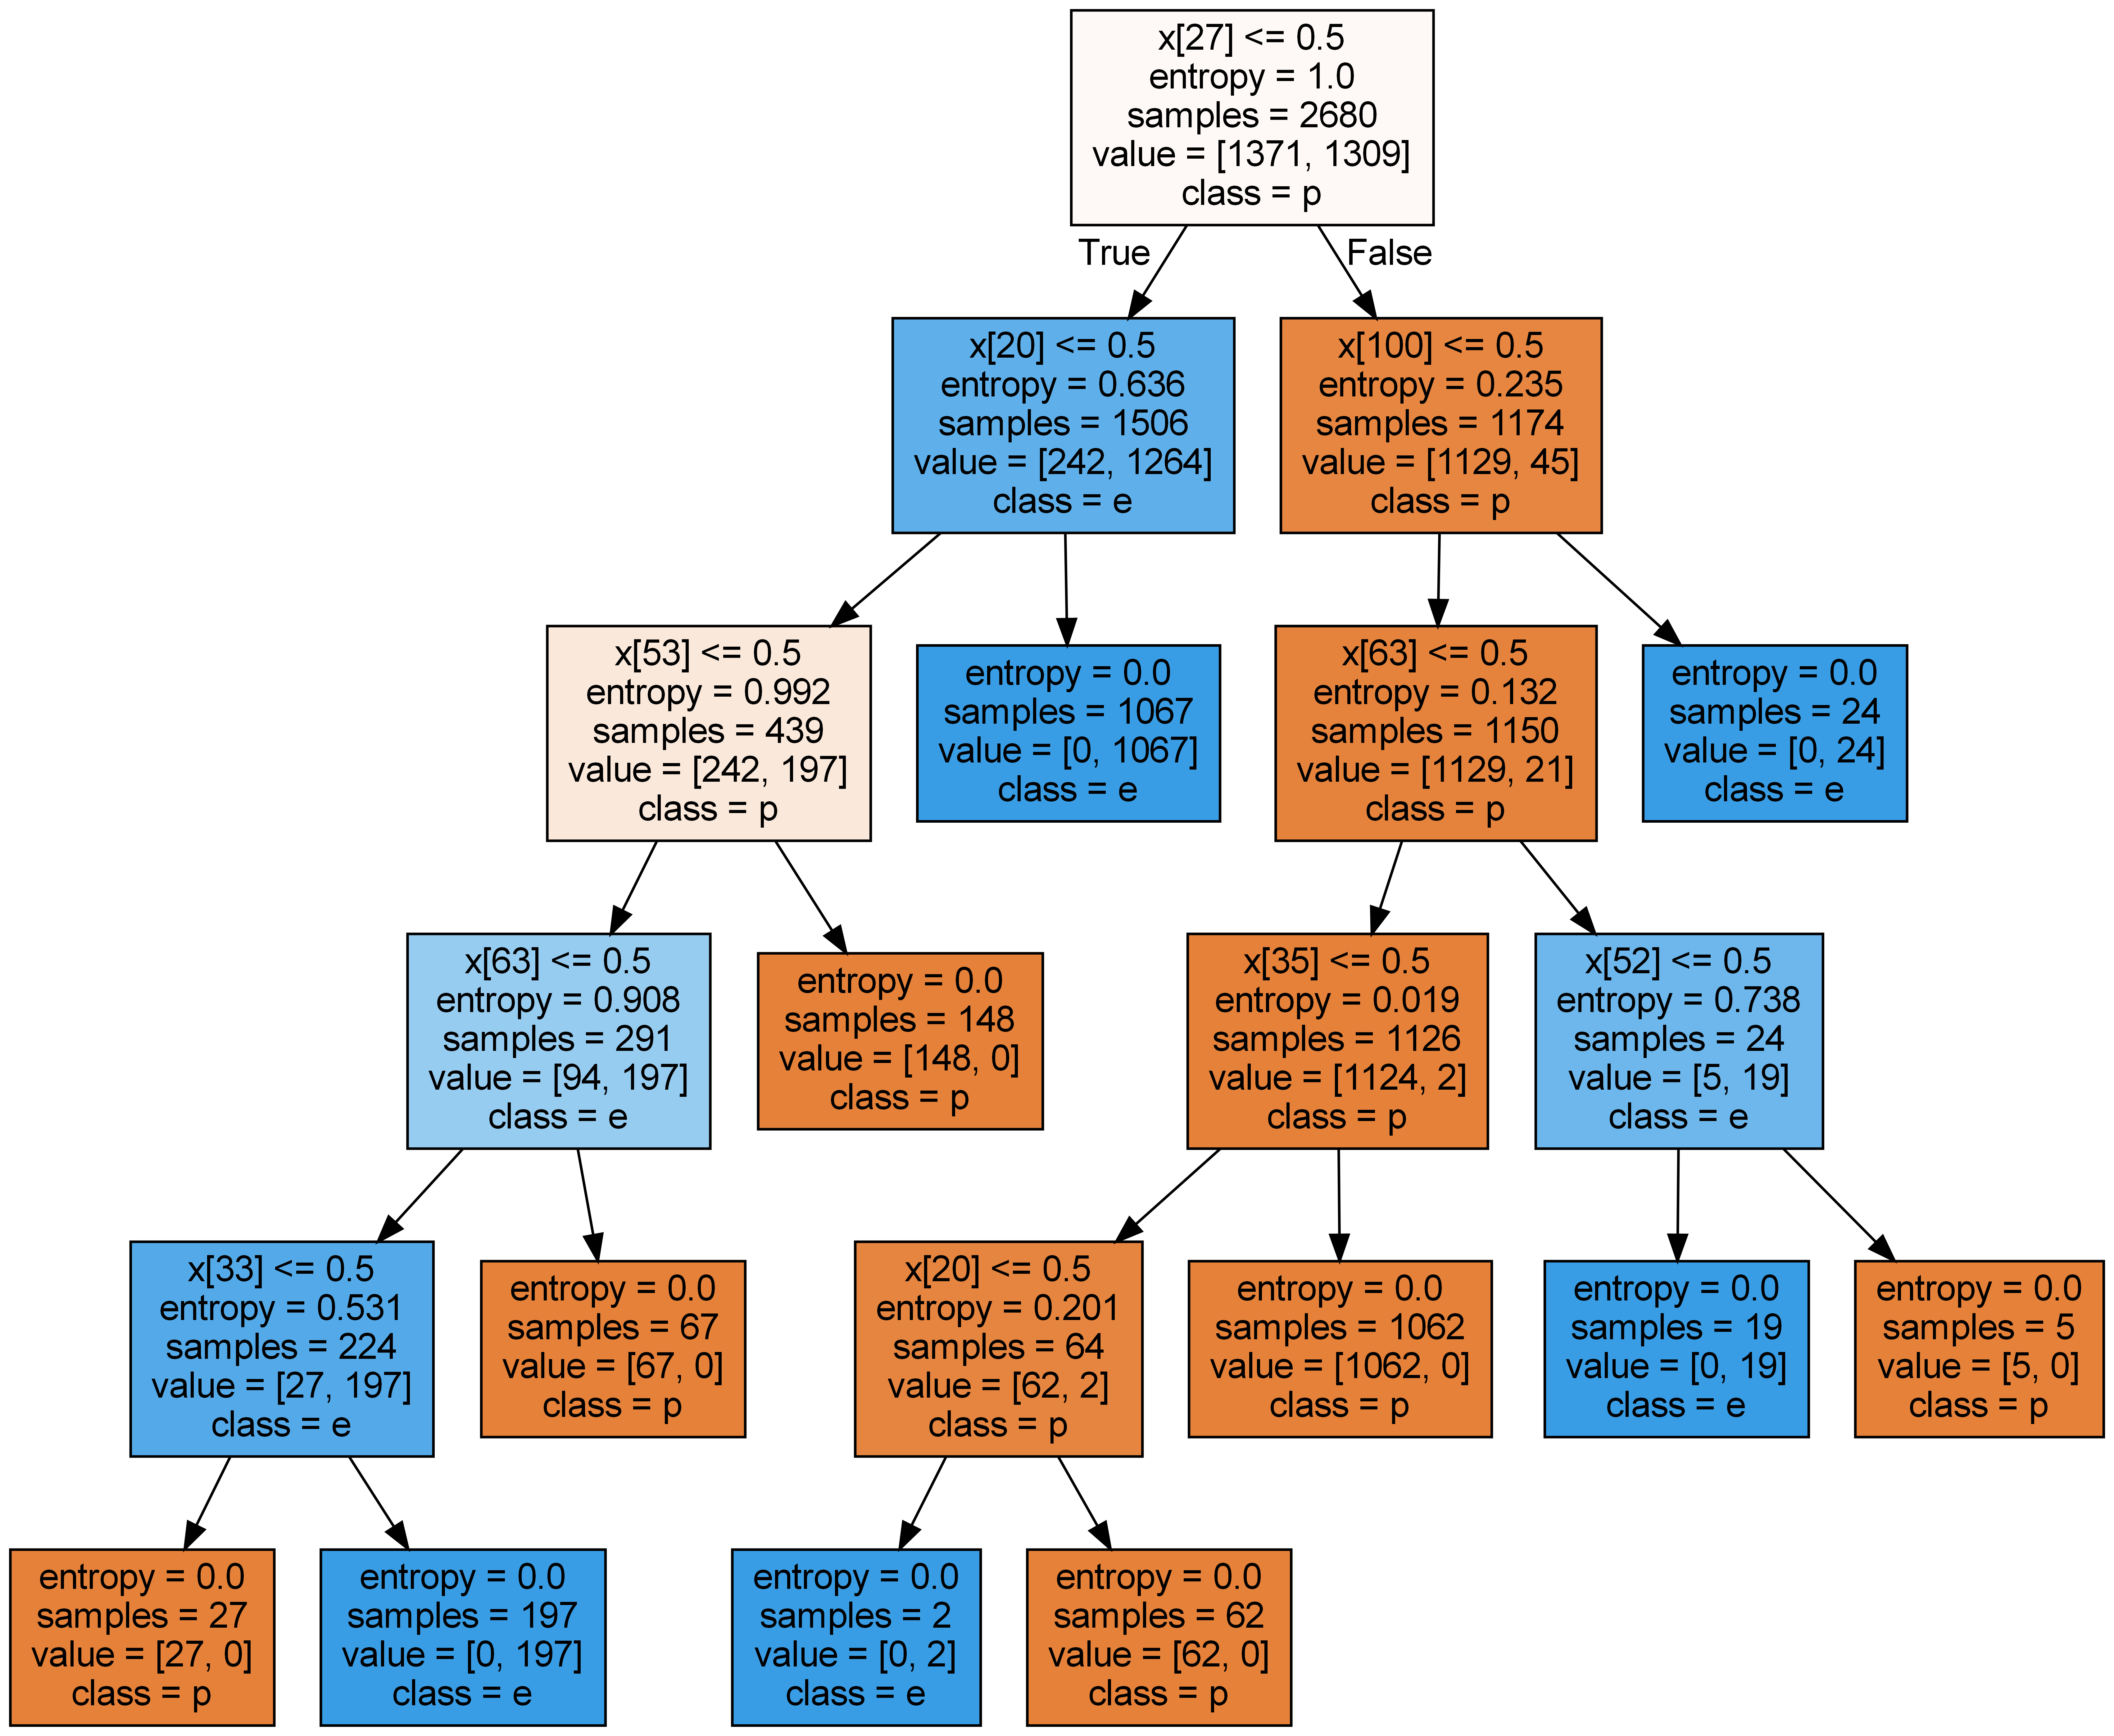

In [23]:
from IPython.display import Image
Image(filename = 'decistion-tree.png')

In [24]:
y_predicted = best_clf.predict(X_test)

In [25]:
precision_score(y_test, y_predicted)

1.0

In [26]:
recall_score(y_test, y_predicted)

1.0

In [27]:
conf_matrix = confusion_matrix(y_test, y_predicted)

In [28]:
disp = ConfusionMatrixDisplay(conf_matrix)

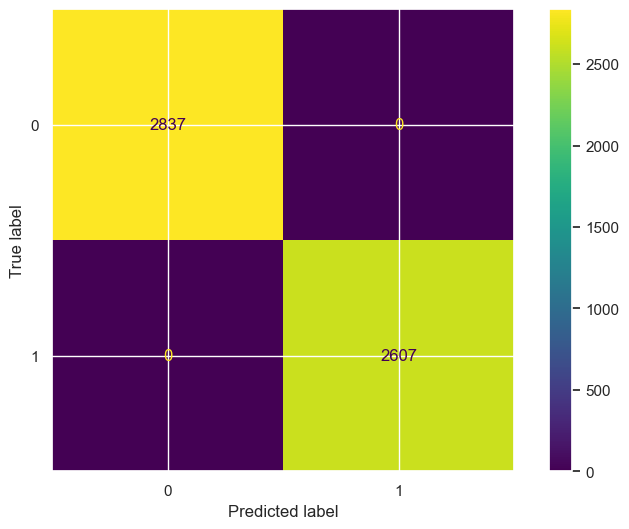

In [29]:
disp.plot()

In [98]:
y_predicted_prob = best_clf.predict_proba(X_test)

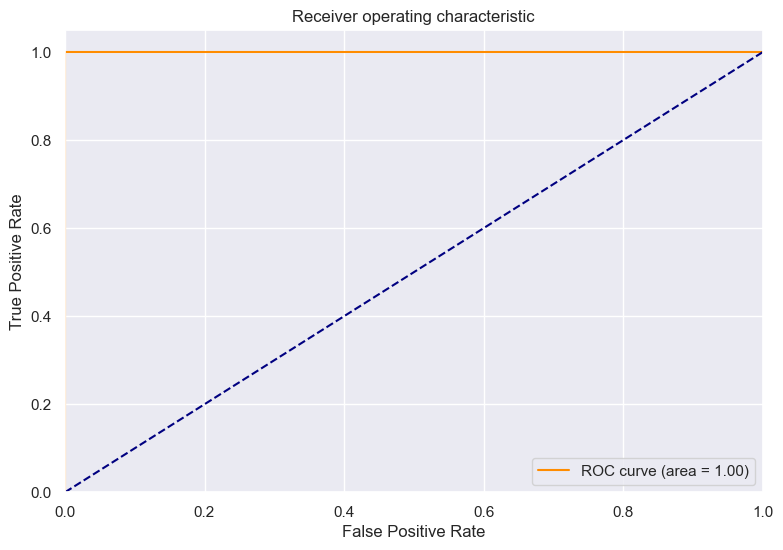

In [99]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])

In [33]:
imp.sort_values('importance', ascending=False)

,importance
odor_n,0.539689
bruises_f,0.199677
stalk-surface-below-ring_y,0.096165
stalk-root_c,0.064034
spore-print-color_r,0.046326
...,...
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000
gill-attachment_f,0.000000


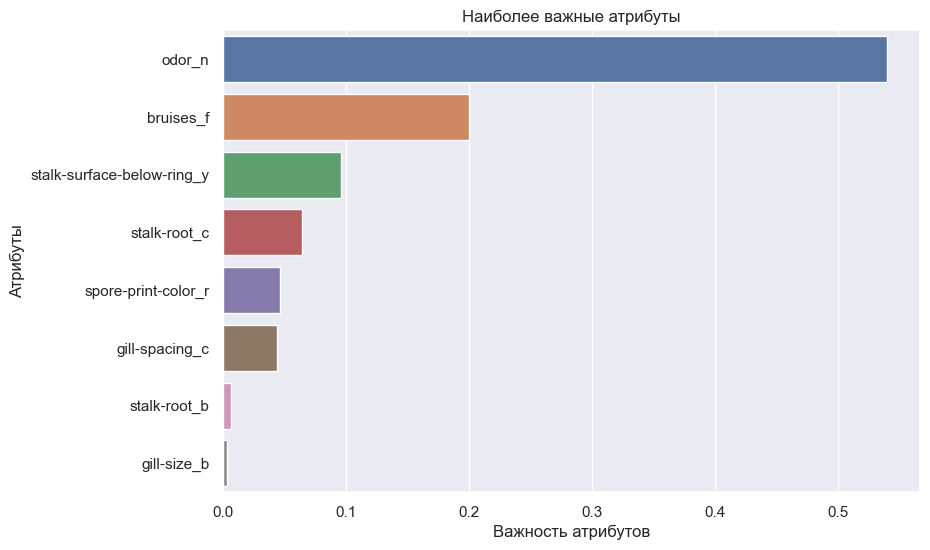

In [96]:
# Создадим атрибут feature_importances и сохраним его в отдельную переменную.
feature_importances = best_clf.feature_importances_
# и сделаем DataFrame, одна колонка - имена переменных, другая - важность переменных, отсортированные по убыванию.
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances}) \
    .sort_values(by='feature_importances', ascending=False).head(8)

# Построение графика.
f, ax = plt.subplots()
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()

In [35]:
import graphviz

In [36]:
columns=list(X_train.columns)
dot_data = tree.export_graphviz(best_clf,out_file=None,feature_names=columns,class_names=True, filled=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("classifiers/classifier.txt","w+")
f.write(dot_data)
f.close()

In [37]:
import pickle

In [38]:
filename = 'best_model_dt_mushrooms.sav'
pickle.dump(best_clf, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

In [39]:
parameters = {'criterion' : ['entropy'], 'max_depth' : range(1, 5), 'min_samples_split' : range(5, 50, 5), 'min_samples_leaf' : range(5, 50, 2)}

In [40]:
grid_search_cv_not_the_best = GridSearchCV(clf, parameters, cv=5, n_jobs=-1, verbose=1)

In [41]:
grid_search_cv_not_the_best.fit(X_train, y_train)

Fitting 5 folds for each of 828 candidates, totalling 4140 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 5),
                         'min_samples_leaf': range(5, 50, 2),
                         'min_samples_split': range(5, 50, 5)},
             verbose=1)

In [42]:
not_the_best_clf = grid_search_cv_not_the_best.best_estimator_

In [43]:
grid_search_cv_not_the_best.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 13,
 'min_samples_split': 5}

In [44]:
export_graphviz(not_the_best_clf, out_file='not_the_best_tree.dot', class_names=["p","e"], filled=True)

In [45]:
call(['dot','-Tpng','not_the_best_tree.dot','-o', 'not_the_best_decision-tree.png','-Gdpi=600'])

0

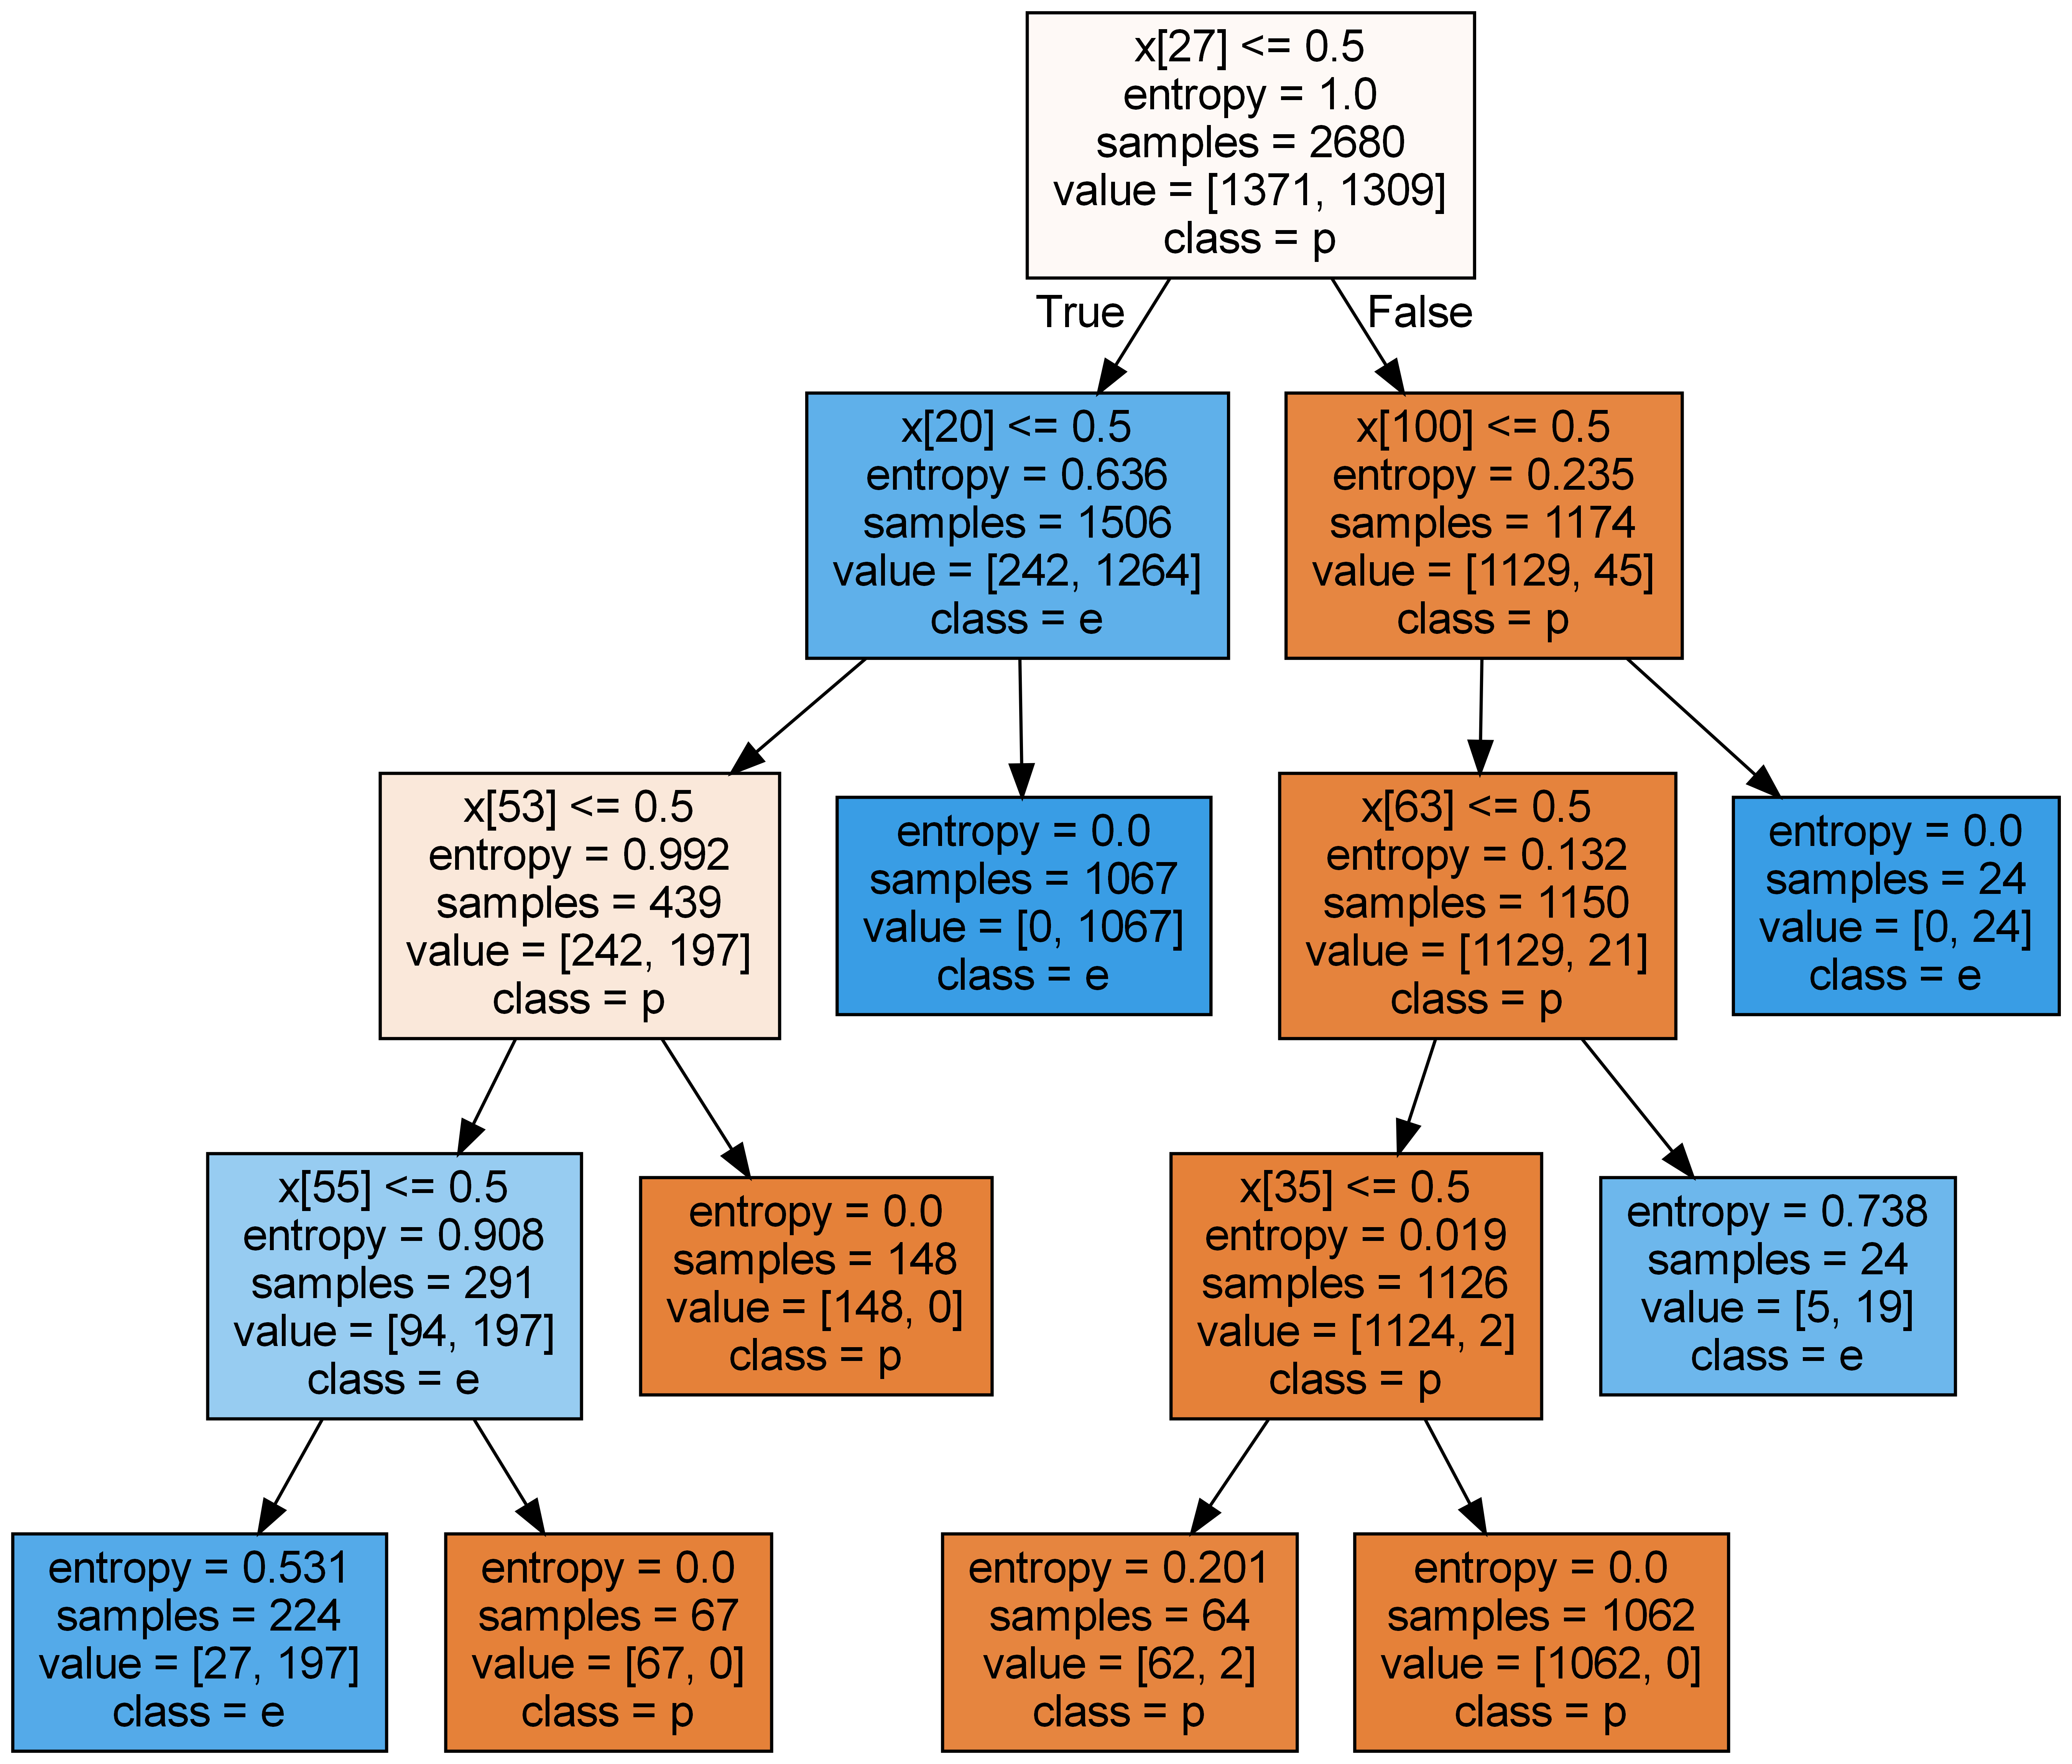

In [46]:
Image(filename = 'not_the_best_decision-tree.png')

In [47]:
y_pred = not_the_best_clf.predict(X_test)

In [48]:
precision_score(y_test, y_pred)

0.9701603879149571

In [49]:
columns=list(X_train.columns)
dot_data = tree.export_graphviz(not_the_best_clf,out_file=None,feature_names=columns,class_names=True, filled=True)
graph = graphviz.Source(dot_data)
graph.render("not_the_best_image",view=True)
f = open("classifiers/not_the_best_classifier.txt","w+")
f.write(dot_data)
f.close()

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [89]:
data = pd.DataFrame(conf_matrix)

In [90]:
data.columns = ['Actual_True', 'Actual_False']
data.index = ['Predicted_True', 'Predicted_False']

In [91]:
data

,Actual_True,Actual_False
Predicted_True,2757,80
Predicted_False,6,2601


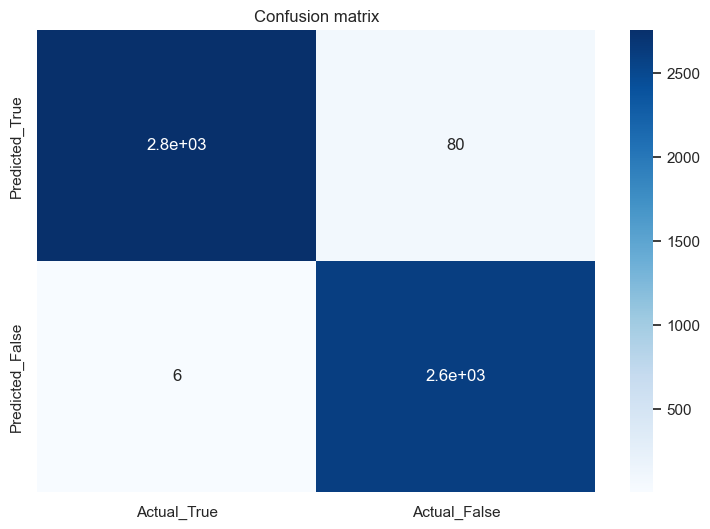

In [93]:
ax = plt.axes()
sns.heatmap(data, annot=True, cmap='Blues', ax=ax)
ax.set_title('Confusion matrix')
plt.show()

In [94]:
y_predicted_prob = not_the_best_clf.predict_proba(X_test)

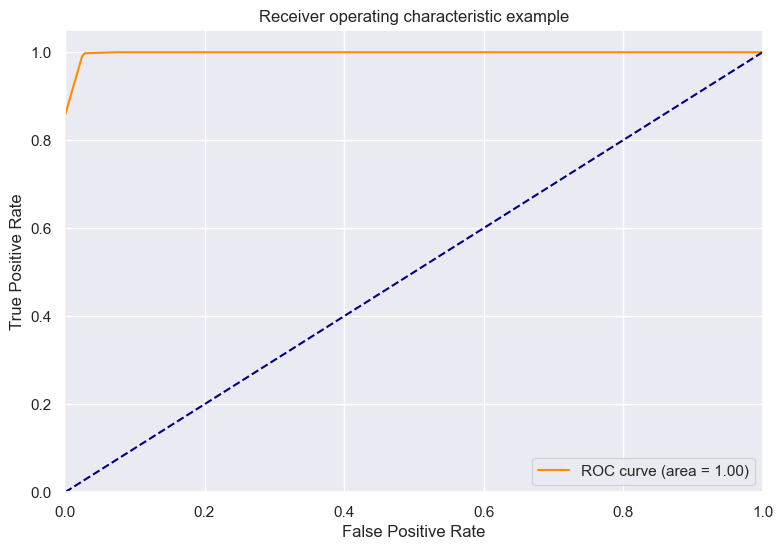

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()